# Exercise 1: Numerical solution to the SIR Model

We will use a numerical ODE solver to integrate the SIR model. Our state variables are (S, I, R) and our parameters are beta and gamma.

In [12]:
# Load libraries
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

Define a function for numerically integrating the SIR model

In [9]:
def sir_model(state, time, parameters):
    # Unpack Parameters
    S, I, R = state
    beta, gamma = parameters
    
    # Calculate total population size
    N = S + I + R
    
    # Calculate force of infection
    lambd = beta * I / N
    
    # Calculate derivatives
    dS = -lambd * S
    dI = lambd * S - gamma * I
    dR = gamma * I
    
    # Return derivative
    return [dS, dI, dR]

Define the initial state variables, parameters, and time span. 

In [10]:
# Initial values for state variables
initial_state_values = [9999, 1, 0]

# Parameter values
parameters = {'beta': 1, 'gamma': 0.5}

# Define a list of time steps
times = np.arange(0, 50.1, 0.1)



Integrate the SIR function defined earlier.

In [13]:
# Integrate
sir_output = odeint(sir_model, initial_state_values, times, args=(list(parameters.values()),))

# Create a pandas DataFrame from the output
sir_output = pd.DataFrame(sir_output, columns=['S', 'I', 'R'])
sir_output['time'] = times

In [15]:
sir_output.head()

,S,I,R,time
0,9999.000000,1.000000,0.000000,0.0
1,9998.897469,1.051260,0.051271,0.1
2,9998.789684,1.105147,0.105170,0.2
3,9998.676375,1.161794,0.161831,0.3
4,9998.557259,1.221343,0.221398,0.4


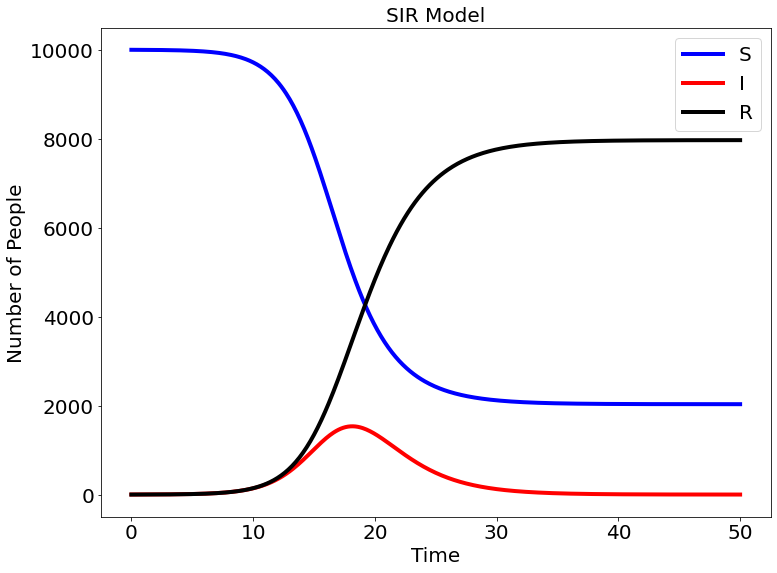

In [35]:
# Plot the output
plt.figure(figsize = (12,9))
plt.plot(sir_output.loc[:,'time'], sir_output.loc[:,'S'], label='S', color = 'blue', linewidth = 4)
plt.plot(sir_output.loc[:,'time'], sir_output.loc[:,'I'], label='I', color = 'red', linewidth = 4)
plt.plot(sir_output.loc[:,'time'], sir_output.loc[:,'R'], label='R', color = 'black', linewidth = 4)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Number of People', fontsize = 20)
plt.title('SIR Model', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

## Question: What do you notice about the model output? 
Describe what you see about all three state variables. In particular, how does the number of infected people vary over time?


## Question: Varying beta and gamma
Try a few different combinations of beta and gamma, and see how the plot changes.


## Question: Analyzing the Outbreak

How many total people became infected? (The epidemic is over when fewer than one people remain infected)

In [40]:
filtered_rows = sir_output[sir_output['I'] <= 1]

r_value = filtered_rows.iloc[-1]['R']
r_value

7967.902478880443

What time was the peak of the epidemic?

In [42]:
max_i_rows = sir_output[sir_output['I'] == max(sir_output['I'])]
max_i_time = max_i_rows.iloc[0]['time']
max_i_time

18.1

How many people were infected at the time of the peak?

In [44]:
max_i_value = max_i_rows.iloc[0]['I']
max_i_value

1534.6523467020502